In [1]:
import torch
import torch.nn as nn
from torchinfo import summary
from data.datasets import BinaryFewShot
from torchvision import datasets
from torchvision import transforms as T

In [2]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)
EPOCHS = 10 #"Don't forget to define me!"
train_dir = "toy_data/"
transforms = T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomVerticalFlip(),
            T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.RandomErasing(p=0.1, value='random')
        ])
trainset = BinaryFewShot(train_dir, transform = transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, num_workers=1)

In [3]:
anchor_image, supset1, supset2 = trainset.__getitem__(0)

In [10]:
len(anchor_image)

3

In [4]:
len(supset1)

3

In [5]:
len(supset2)

3

In [6]:
transform = T.ToPILImage()

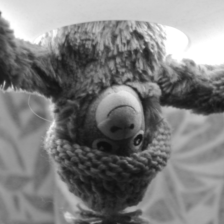

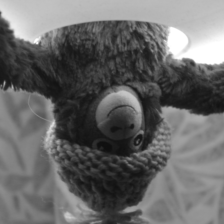

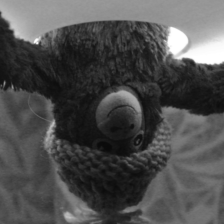

In [13]:
for img in anchor_image:
    display(transform(img))

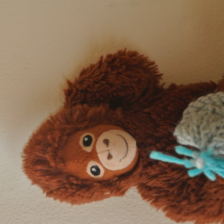

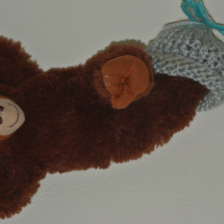

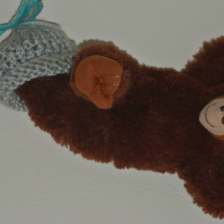

In [8]:
for img in supset1:
    display(transform(img))
    

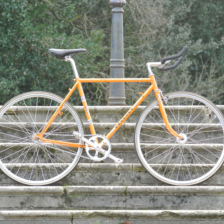

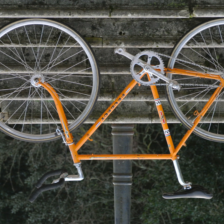

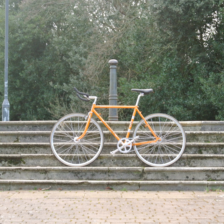

In [9]:
for img in supset2:
    display(transform(img))
    